[Periodic case](#Periodic-case)
[Weak disorder](#Weak-disorder)
[Strong disorder](#Strong-disorder)
[Fibonacci](#FC-case)
[Diagonal disorder](#Diagonal-disorder)
[AAH](#AAH)
[Fractal](#Fractal)
[Chain](#Chain)

In [2]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams.update({'figure.autolayout': True})


comp_per = pickle.load(open("comp_per.p","rb"))

In [ ]:
def plot_Gaussian(data, specs=(0,0), Title = True, Label = False):
    bins = 50
    fig, ax = plt.subplots()
    L,wt = specs
    
    yy,xx, _ = ax.hist(data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
    xx = (xx[:-1]+xx[1:])/2
    ax.set_xlabel("$\Delta_{mid}$")
    ax.set_ylabel("Number of realizations")
    if Title==True:
        ax.set_title("Length = {}, N_trials = {}, w = {}".format(L,len(data),wt))
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        labelleft=False)

    mod = lmf.models.GaussianModel()
    pars = mod.guess(yy, x=xx)
    gaussian_fit = mod.fit(yy ,pars, x=xx)
    sigma = gaussian_fit.values["sigma"]
    center = gaussian_fit.values["center"]

    # plt.locator_params(nbins=5)
    ax.set_xticks([center-2*sigma,center,center+2*sigma])
    ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

    ax.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
    if Label:
        ax.legend()
    ax.annotate("(b)",(0.02,0.9),xycoords = 'axes fraction')
    

# Periodic case

In [131]:
comp_per = pickle.load(open("comp_per.p","rb"))
# [print(key) for key in comp_per.keys()]

keys = comp_per.keys()
Delta_mids = {}
for (beta,L) in keys:
    Delta_mids[(beta ,L)] = comp_per[(beta,L)][L//2]

Ls = np.unique([L for (beta,L)  in Delta_mids.keys()])

In [132]:
def inv(x, amp,offset):
    return amp * 1/(x + offset)
mod = lmf.Model(inv)
pars = mod.make_params(amp = 1.0, offset = 0)
inv_fit = mod.fit([Delta_mids[(4000,L)] for L in Ls],pars, x=[L/2 for L in Ls])

def lin(x, log_amp, xi):
    return log_amp - xi * x
mod = lmf.Model(lin)
pars = mod.make_params(log_amp = 1.0, xi = 1)
lin_fit = mod.fit([np.log(Delta_mids[(20,L)]) for L in Ls][:-2],pars, x=[L/2 for L in Ls][:-2])

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:676: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


10.031511911025845
6.385649089493598


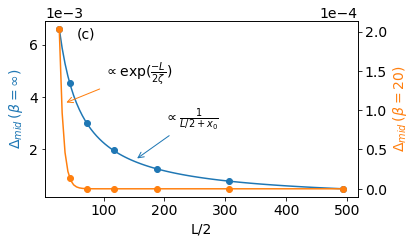

In [134]:
lls = np.linspace(min(Ls),max(Ls),100)


fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(Ls/2, [Delta_mids[(4000,L)]for L in Ls], "C0o")
ax1.plot(lls/2, inv_fit.params["amp"].value/(lls/2 + inv_fit.params["offset"].value))
ax2 = ax1.twinx()
ax2.plot(Ls/2, [Delta_mids[(20,L)]for L in Ls], "C1o")
ax2.plot(lls/2,np.exp(lin_fit.params["log_amp"].value)*np.exp(-lin_fit.params["xi"].value*lls/2), "C1")
# ax1.legend(
#     [mpl.lines.Line2D([0], [0], color="white", marker='o', markerfacecolor="C0", markersize = 8),
#      mpl.lines.Line2D([0], [0], color="white", marker='o', markerfacecolor="C1", markersize = 8)],
#     ["$\\beta = \infty$","$\\beta = 20$"]
# )
ax1.annotate("$\propto \\frac{1}{L/2 + x_0}$",(233/4+377/4,Delta_mids[(4000,233)]/2 + Delta_mids[(4000,377)]/2),xytext = (200,Delta_mids[(4000,145)]), arrowprops = dict(arrowstyle="->",color = "C0"))
ax2.annotate("$\propto \\exp(\\frac{-L}{2 \\zeta})$",(55/4+89/4,Delta_mids[(20,55)]/2 + Delta_mids[(20,89)]/2),xytext = (100,Delta_mids[(20,89)]/2 + Delta_mids[(20,55)]/1.5), arrowprops = dict(arrowstyle="->",color = "C1"))
ax1.set_xlabel("L/2")
ax1.set_ylabel("$\Delta_{mid}\,(\\beta = \infty)$",color = "C0")
ax2.set_ylabel("$\Delta_{mid} \,(\\beta = 20)$",color = "C1")
ax1.ticklabel_format(axis = "y", style = "sci", scilimits = (0,0))
ax2.ticklabel_format(axis = "y", style = "sci", scilimits = (0,0))

ax1.annotate("(c)",(0.1,0.9),xycoords = 'axes fraction')
plt.savefig("per-scaling.pdf")

print(inv_fit.params["offset"].value)
print(1/lin_fit.params["xi"].value)

# Weak disorder

In [8]:
comp_dis = pickle.load(open("comp_dis.p","rb"))
# [print((key, len(comp_dis[key]))) for key in comp_dis.keys()]
/

()

### Weak disorder histogram

10000


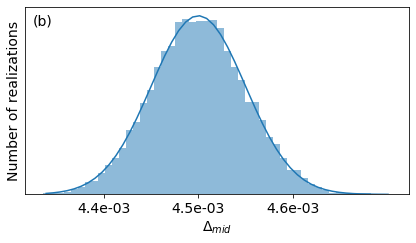

In [66]:
l = 89
w = 0.005
Delta_mids = []

Delta_mids = [Delta[(l)//2] for Delta in comp_dis[(l,w)]]
Delta_mids += pickle.load(open("dis890005.p","rb"))

print("{}".format(len(Delta_mids)))
plot_Gaussian(Delta_mids, (l,w), Title = False)

plt.savefig("weak-dis-hist.pdf")

plt.show()

### Scaling

offset = 10.41
alpha = 1.00
offset = 22.99
alpha = 1.02


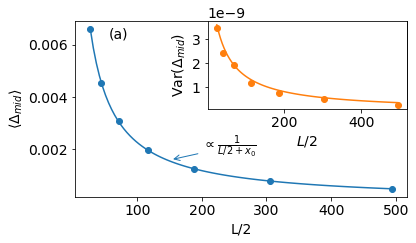

In [11]:
keys = comp_dis.keys()
Delta_mids = {}
Delta_mids2 = {}
for (L,wt) in keys:
    if wt ==0.005:
        Delta_mids[L] = [1/2*Delta[L//2]+1/2*Delta[(L+1)//2] for Delta in comp_dis[(L,wt)]]
        Delta_mids2[L] = [Delta[L//2] for Delta in comp_dis[(L,wt)]]
        
Ls = np.array([L for L in sorted(Delta_mids.keys())])
As = np.array([stats.describe(Delta_mids[L]).mean for L in Ls])
Vars = np.array([stats.describe(Delta_mids2[L]).variance for L in Ls])
Vars_log = np.array([stats.describe(np.log(Delta_mids2[L])).variance for L in Ls])
LLs =Ls/2

def inv(x, amp,offset,alpha ):
    return amp * 1/(x**alpha + offset)

mod = lmf.Model(inv)
pars = mod.make_params(amp = 1.0, offset = 0,alpha=1)
pars['alpha'].set(vary = False)
inv_fit = mod.fit([stats.describe(Delta_mids[L]).mean for L in Ls],pars, x=LLs)



lls = np.linspace(min(Ls),max(Ls),100)/2

fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(LLs, [stats.describe(Delta_mids[L]).mean for L in Ls], "C0o")
ax1.plot(lls, inv_fit.params["amp"].value/(lls + inv_fit.params["offset"].value))

ax1.annotate("$\propto \\frac{{{}}}{{{}}}$".format(1,"L/2 + x_0"),(233/4+377/4,As[3]/2 + As[4]/2),xytext = (200,As[3]), arrowprops = dict(arrowstyle="->",color = "C0"))
ax1.set_xlabel("L/2")
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle$")

print("offset = {:.2f}".format(inv_fit.params["offset"].value))
print("alpha = {:.2f}".format(inv_fit.params["alpha"].value))


axin = ax1.inset_axes([0.4,0.5,0.6,0.5])
pars['alpha'].set(vary = True)
inv_fit2 = mod.fit([Vars for L in Ls],pars, x=LLs)
print("offset = {:.2f}".format(inv_fit2.params["offset"].value))
print("alpha = {:.2f}".format(inv_fit2.params["alpha"].value))

axin.plot(LLs, Vars, "C1o")
axin.plot(lls, inv_fit2.params["amp"].value/(lls + inv_fit2.params["offset"].value), "C1")
axin.set_xlabel("$L/2$")
axin.set_ylabel("Var($\\Delta_{mid}$)")
# axin.set_xticks([])

ax1.annotate("(a)",(0.1,0.9),xycoords = 'axes fraction')
plt.savefig("weak-dis-scaling.pdf")




Text(0, 0.5, '$Var(\\Delta_{mid})/\\langle\\Delta_{mid}\\rangle^2$')

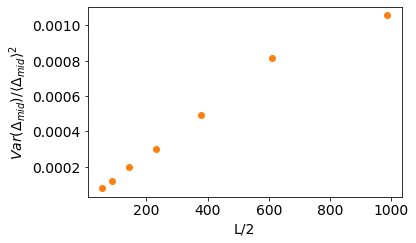

In [152]:
plt.plot(Ls, Vars/As**2, "C1o")
plt.xlabel("L/2")
plt.ylabel("$Var(\\Delta_{mid})/\\langle\Delta_{mid}\\rangle^2$")

### w scaling

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


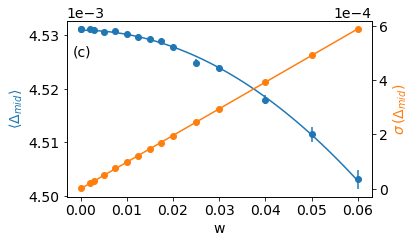

In [90]:
ll =89
Delta_mids = {}
Delta_mids2 = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if l==ll:
        Delta_mids[w] = [1/2*Delta[l//2]+1/2*Delta[(l+1)//2] for Delta in Deltas]
        Delta_mids2[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        

Delta_mids[0] = comp_per[(4000,ll)][ll//2]
Delta_mids2[0] = comp_per[(4000,ll)][ll//2]
Stats[0] = stats.describe([Delta_mids[0]]*10000)
Stats_log[0] = stats.describe(np.log([Delta_mids[0]]*10000))
        
ws = [w for w in sorted(Stats.keys()) if Stats[w].nobs][:-9]

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax1.errorbar(ws,[Stats[w].mean for w in ws],yerr = [np.sqrt(Stats[w].variance)/np.sqrt(Stats[w].nobs) for w in ws], fmt = 'none')
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle$", color = "C0")
ax1.set_xlabel("w")
ax1.ticklabel_format(axis = "y", style = "sci", scilimits = (0,0))
ax2 = ax1.twinx()
ax2.ticklabel_format(axis = "y", style = "sci", scilimits = (0,0))
ax2.plot(ws,[np.sqrt(stats.describe(Delta_mids2[w]).variance) for w in ws], "C1o")
ax2.set_ylabel('$\sigma\,(\Delta_{mid})$', color = "C1")

def lin(x, y_int, m):
    return y_int + m * x
wspace = np.linspace(min(ws),max(ws),100)

Fs = [Stats[0].mean - Stats[w].mean for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs, pars, x = [w**2 for w in ws])
ax1.plot(wspace, [Stats[0].mean - lin_fit.params["y_int"].value - lin_fit.params["m"].value*w**2 for w in wspace], "C0")


Fs = [np.sqrt(stats.describe(Delta_mids2[w]).variance) for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs[1:], pars, x = [w for w in ws][1:])
ax2.plot(wspace, [lin_fit.params["y_int"].value + lin_fit.params["m"].value*w for w in wspace], "C1")


ax1.annotate("(c)",(0.02,0.8),xycoords = 'axes fraction')
plt.savefig("weak-dis-w.pdf")

# Strong disorder

In [27]:
comp_dis = pickle.load(open("comp_dis.p","rb"))
# [print((key, len(comp_dis[key]))) for key in comp_dis.keys()]
/

()

### Scaling

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


zeta = 2.892
alpha = 0.500


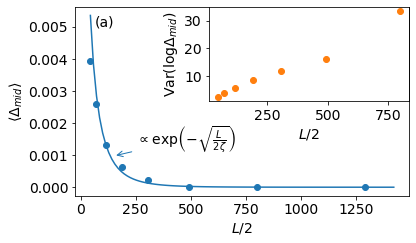

In [30]:
keys = comp_dis.keys()
Delta_mids = {}
Delta_mids2 = {}
for (L,wt) in keys:
    if wt ==0.7:
        Delta_mids[L] = [1/2*Delta[L//2]+1/2*Delta[(L+1)//2] for Delta in comp_dis[(L,wt)]]
        Delta_mids2[L] = [Delta[L//2] for Delta in comp_dis[(L,wt)]]
        
Ls = np.array([L for L in sorted(Delta_mids.keys())])[:]
As = np.array([stats.describe(Delta_mids[L]).mean for L in Ls])
Vars = np.array([stats.describe(Delta_mids2[L]).variance for L in Ls])
Vars_log = np.array([stats.describe(np.log(Delta_mids2[L])).variance for L in Ls])
LLs =Ls/2

def lin(x, log_amp, xi, alpha):
    return log_amp - xi*x**alpha

mod = lmf.Model(lin)
pars = mod.make_params(log_amp = 0, xi=10, alpha = 0.5)
pars['alpha'].set(vary = False)
lin_fit = mod.fit(np.log(As)[:-1],pars, x=LLs[:-1])

lls = np.linspace(min(Ls),1.1*max(Ls),100)/2

fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(Ls/2, As, "C0o")
ax1.plot(lls,np.exp(lin_fit.params["log_amp"].value)*np.exp(-lin_fit.params["xi"].value*lls**lin_fit.params["alpha"]), "C0")
ax1.annotate("$\propto \\exp\\left(-\\sqrt{{\\frac{{L}}{{2 \\zeta}}}} \\right)$",(233/4+377/4,As[2]/2 + As[3]/2),xytext = (250,As[2]), arrowprops = dict(arrowstyle="->",color = "C0"))

print("zeta = {:.3f}".format(1/lin_fit.params["xi"].value))
print("alpha = {:.3f}".format(lin_fit.params["alpha"].value))

ax1.set_xlabel("$L/2$")
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle$")

plt.savefig("strong-dis-scaling.pdf")

axin = ax1.inset_axes([0.4,0.5,0.6,0.5])
axin.plot(LLs[:-1], Vars_log[:-1], "C1o")
axin.set_xlabel("$L/2$")
axin.set_ylabel("Var($\\log\\Delta_{mid}$)")
# axin.set_xticks([])

ax1.annotate("(a)", xycoords = "axes fraction", xy = (0.06,0.9))

plt.savefig("strong-dis-scaling.pdf")


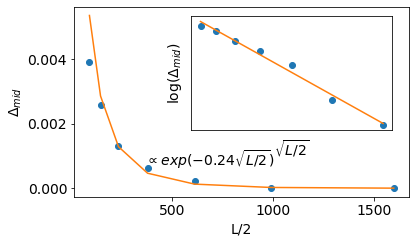

In [18]:
temp = scaling(Ls[:-1], As[:-1])
temp.fit_to_expstr()

9000


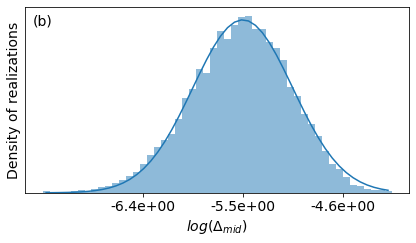

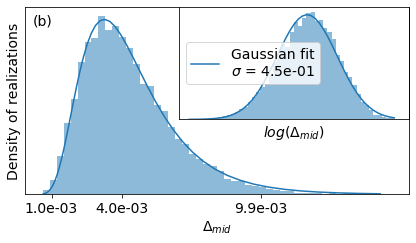

In [19]:
l = 89
w = 0.2
Delta_mids = []

Delta_mids = [Delta[l//2] for Delta in comp_dis[(l,w)]]
Delta_mids += pickle.load(open("dis8902.p","rb"))
print(len(Delta_mids))

data = Delta_mids
bins = 50


# If Log Normal
log_data = np.log(data)

fig, ax = plt.subplots()

yy,xx, _ = ax.hist(log_data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = (xx[:-1]+xx[1:])/2
ax.set_xlabel("$log(\Delta_{mid})$")
ax.set_ylabel("Density of realizations")
# ax.set_title("Length = {}, N_trials = {}, w = {}".format(l+1,len(log_data),w))
ax.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

mod = lmf.models.GaussianModel()
pars = mod.guess(yy, x=xx)
gaussian_fit = mod.fit(yy ,pars, x=xx)
sigma = gaussian_fit.values["sigma"]
center = gaussian_fit.values["center"]

ax.set_xticks([center-2*sigma,center,center+2*sigma])
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

ax.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
# ax.legend()

ax.annotate("(b)",(0.02,0.9),xycoords = 'axes fraction')
plt.savefig("strong-dis-hist.pdf")

plt.show()


fig, ax = plt.subplots()

logyy, logxx = yy, xx

yy, xx, _ = ax.hist(data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = (xx[:-1]+xx[1:])/2
ax.set_xlabel("$\Delta_{mid}$")
ax.set_ylabel("Density of realizations")
# ax.set_title("Length = {}, N_trials = {}, w = {}".format(l+1,len(data),w))
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

ax.plot(np.exp(logxx),gaussian_fit.best_fit*np.exp(-logxx), label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
axin = ax.inset_axes([0.4,0.4,0.6,0.6])
_, xx, _ = axin.hist(log_data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = xx[:-1]
axin.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
axin.set_xlabel("$log(\Delta_{mid})$")
axin.tick_params(
    axis = "both",
    which = "both",
    left = False,
    labelleft = False,
    bottom = False,
    labelbottom = False
)
axin.legend()

sigma = gaussian_fit.values["sigma"]
center = gaussian_fit.values["center"]

ax.set_xticks([np.exp(center-3*sigma),np.exp(center),np.exp(center+2*sigma)])
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

ax.annotate("(b)",(0.02,0.9),xycoords = 'axes fraction')
# plt.savefig("strong-dis-hist.pdf")

plt.show()


//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


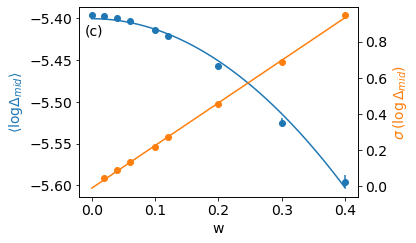

In [21]:
ll = 89
Delta_mids = {}
Delta_mids2 = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if l==ll:
        Delta_mids[w] = [1/2*Delta[l//2]+1/2*Delta[(l+1)//2] for Delta in Deltas]
        Delta_mids2[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        

Delta_mids2[0] = comp_per[(4000,ll)][ll//2]
Delta_mids[0] = comp_per[(4000,ll)][ll//2]
Stats[0] = stats.describe([Delta_mids[0]]*10000)
Stats_log[0] = stats.describe(np.log([Delta_mids[0]]*10000))
        
ws = [w for w in sorted(Stats.keys()) if w in 0.02*np.arange(200)][:]

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats_log[w].mean for w in ws], "C0o")
ax1.errorbar(ws,[Stats_log[w].mean for w in ws],yerr = [np.sqrt(Stats_log[w].variance)/np.sqrt(Stats_log[w].nobs) for w in ws], fmt = 'none')
ax1.set_ylabel("$\\langle\\log\Delta_{mid}\\rangle$", color = "C0")
ax1.set_xlabel("w")
ax1.ticklabel_format(style = "sci")
ax2 = ax1.twinx()
ax2.plot(ws,[np.sqrt(stats.describe(np.log(Delta_mids2[w])).variance) for w in ws], "C1o")
ax2.set_ylabel('$\sigma\,(\\log\,\Delta_{mid})$', color = "C1")

def lin(x, y_int, m):
    return y_int + m * x
wspace = np.linspace(min(ws),max(ws),100)

Fs = [Stats_log[0].mean - Stats_log[w].mean for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs, pars, x = [w**2 for w in ws])
ax1.plot(wspace, [Stats_log[0].mean - lin_fit.params["y_int"].value - lin_fit.params["m"].value*w**2 for w in wspace], "C0")

Fs = [np.sqrt(stats.describe(np.log(Delta_mids2[w])).variance) for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs[1:], pars, x = [w for w in ws[1:]])
ax2.plot(wspace, [lin_fit.params["y_int"].value + lin_fit.params["m"].value*w for w in wspace], "C1")


ax1.annotate("(c)",(0.02,0.85),xycoords = 'axes fraction')
plt.savefig("strong-dis-w.pdf")

# FC case

In [13]:
comp_FC = pickle.load(open("comp_FC.p","rb"))
keys = sorted(comp_FC.keys())
[print((key, len(comp_FC[key]))) for key in keys]
/

((89, 0.05), 89)
((89, 0.1), 89)
((89, 0.15), 89)
((89, 0.2), 89)
((89, 0.25), 89)
((89, 0.3), 89)
((89, 0.5), 89)
((144, 0.01), 144)
((144, 0.05), 144)
((144, 0.1), 144)
((144, 0.2), 144)
((144, 0.25), 144)
((144, 0.3), 144)
((144, 0.5), 144)
((233, 0.05), 233)
((233, 0.1), 233)
((233, 0.15), 233)
((233, 0.2), 233)
((233, 0.25), 233)
((233, 0.3), 233)
((233, 0.5), 233)
((377, 0.05), 377)
((377, 0.1), 377)
((377, 0.15), 377)
((377, 0.2), 377)
((377, 0.25), 377)
((377, 0.3), 377)
((377, 0.5), 377)
((610, 0.05), 610)
((610, 0.1), 610)
((610, 0.15), 610)
((610, 0.2), 610)
((610, 0.25), 610)
((610, 0.3), 610)
((610, 0.5), 610)
((987, 0.1), 987)
((987, 0.25), 987)


()

### Scaling

In [44]:
ww = 0.1
Delta_mids = {}
Delta_mids2 = {}
Stats = {}
Stats_log = {}
for (l, w),Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if w==ww:
        Delta_mids[l] = [1/2*Delta[(l+1)//2] + 1/2*Delta[l//2] for Delta in Deltas]
        Delta_mids2[l] = [Delta[(l+1)//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
Ls = np.array([l for l in sorted(Stats.keys())])[:]
Lodds = np.array([l for l in sorted(Stats.keys()) if l%2])[:]
LLs = Ls/2

Gs = np.array([stats.gmean(Delta_mids[l]) for l in Ls])
Vars = np.array([stats.describe(Delta_mids2[l]).variance for l in Lodds])
Vars_log = np.array([stats.describe(np.log(Delta_mids[l])).variance for l in Lodds])
Godds = np.array([stats.gmean(Delta_mids[l]) for l in Lodds])


def inv(x, amp,alpha,offset):
    return amp * 1/(x**alpha + offset)
mod = lmf.Model(inv)
pars = mod.make_params(amp = 1.0, alpha = 1,offset = 10)
pars["offset"].set(vary = False)
inv_fit = mod.fit(Gs ,pars, x=Ls/2)


In [45]:
inv_fit.params

name,value,standard error,relative error,initial value,min,max,vary
amp,0.24875645,0.00550368,(2.21%),1.0,-inf,inf,True
alpha,1.02652545,0.00610071,(0.59%),1,-inf,inf,True
offset,10.0000000,0.00000000,(0.00%),10,-inf,inf,False


<ErrorbarContainer object of 3 artists>

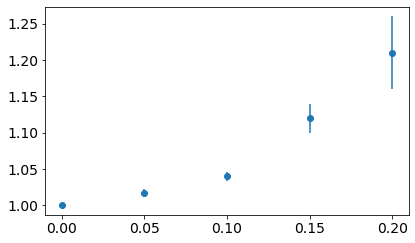

In [52]:
ws =[0,0.05,0.1,0.15,0.2]
alphas2 = [1, 1.003, 1.027, 1.05, 1.13]
alphas_er2 = [0, 0.005, 0.006, 0.02, 0.05]

plt.errorbar(ws, alphas, yerr = alphas_err, fmt = "C0o")

alpha = 1.03
offset = 10.00


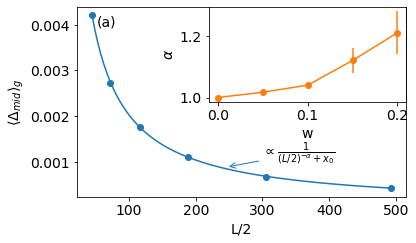

In [55]:
lls = np.linspace(min(LLs),max(LLs),100)

fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(LLs, Gs, "C0o")
ax1.plot(lls, inv_fit.params["amp"].value/((lls)**inv_fit.params["alpha"].value + inv_fit.params["offset"].value))

ax1.annotate("$\propto \\frac{{{}}}{{{}}}$".format(1,"(L/2)^{-\\alpha} + x_0"),(377/4+610/4,Gs[3]/2 + Gs[4]/2),xytext = (300,Gs[3]), arrowprops = dict(arrowstyle="->",color = "C0"))
ax1.set_xlabel("L/2")
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle_g$")

print("alpha = {:.2f}".format(inv_fit.params["alpha"].value))
print("offset = {:.2f}".format(inv_fit.params["offset"].value))


axin = ax1.inset_axes([0.4,0.5,0.6,0.5])

ws = [0,0.05, 0.1,0.15,0.2]

#     slope:     -1.01723184 +/- 0.00718933 (0.71%) (init = 1)
#     slope:     -1.04218560 +/- 0.01099862 (1.06%) (init = 1)
#     slope:     -1.12567851 +/- 0.04181001 (3.71%) (init = 1)
#     slope:     -1.21001801 +/- 0.07363459 (6.09%) (init = 1)

alphas = [1,1.017, 1.04, 1.12, 1.21]
alpha_er = [0,0.007, 0.01,0.04, 0.07]

axin.errorbar(ws, alphas, yerr = alpha_er, fmt = "C1o-")
# axin.errorbar(ws, alphas2, yerr = alphas_er2, fmt = "C1o-")
axin.set_xlabel("w")
axin.set_ylabel("$\\alpha$")

def lin(x, y_int, m):
    return y_int + m * x
wspace = np.linspace(min(ws),max(ws),100)
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(alphas, pars, x = ws)

# axin.plot(wspace, lin_fit.params["y_int"].value + lin_fit.params["m"].value*wspace, "C1")

ax1.annotate("(a)", xycoords = "axes fraction", xy = (0.06,0.9))
plt.savefig("FC-scaling.pdf")

In [77]:
inv_fit

### Scaling take 2

In [27]:
def make_plot(ww, offset = 0, ax = None, ind = 0, normed = False):
    Delta_mids = {}
    Stats = {}
    Stats_log = {}
    for (l, w),Delta_phis in comp_FC.items():
        Deltas = Delta_phis.values()
        if w==ww:
            Delta_mids[l] = [1/2*Delta[(l+1)//2] + 1/2*Delta[l//2] for Delta in Deltas]
            Stats[l] = stats.describe(Delta_mids[l])
            Stats_log[l] = stats.describe(np.log(Delta_mids[l]))

    Ls = np.array([l for l in sorted(Stats.keys())])[:]
    LLs = Ls/2 + offset
    logLLs = np.log(LLs)
    
    logAs = np.array([Stats_log[l].mean for l in Ls])
    logErrs = np.array([np.sqrt(Stats_log[l].variance)/np.sqrt(l) for l in Ls])    
    if normed:
        logAs = logAs - logAs[0]
    
    mod = lmf.models.LinearModel()
    pars = mod.make_params(m=-1,b=0)
    
    
    lin_fit = mod.fit(logAs ,pars, x=logLLs)
    ax.plot(logLLs, logAs, "C"+str(ind)+"o")
    
    loglls = np.linspace(min(logLLs),max(logLLs))
    ax.plot(logLLs, logAs, "C"+str(ind)+"o")
    ax.plot(loglls, lin_fit.params['intercept'].value+lin_fit.params["slope"].value*loglls, "C"+str(ind))
#     lin_fit.plot_fit(ax = ax, datafmt = "C"+str(ind)+"o", fitfmt = "C"+str(ind), yerr = logErrs)
    print("w = {}, power = {:.2f}, ".format(ww,lin_fit.params["slope"].value))
    print(lin_fit.fit_report())
    

w = 0.05, power = -1.02, 
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 2.9939e-04
    reduced chi-square = 9.9796e-05
    Akaike info crit   = -44.6160520
    Bayesian info crit = -45.3971762
[[Variables]]
    slope:     -1.01723184 +/- 0.00718933 (0.71%) (init = 1)
    intercept:  4.07596119 +/- 0.03520824 (0.86%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.992
w = 0.1, power = -1.04, 
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00168435
    reduced chi-square = 4.2109e-04
    Akaike info crit   = -45.0688188
    Bayesian info crit = -45.4852999
[[Variables]]
    slope:     -1.04218560 +/- 0.01099862 (1.06%) (init = 1)
    intercept:  4.16774593 +/- 0.056

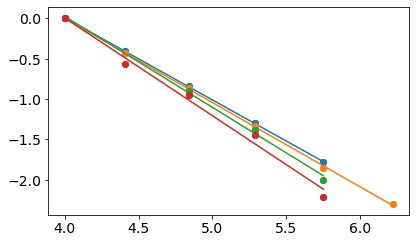

In [28]:
fig, ax = plt.subplots()
ws = [0.05, 0.1,0.15,0.2]

for i,w in enumerate(ws):
    make_plot(w, offset = 10, ax = ax, ind = i, normed = True)



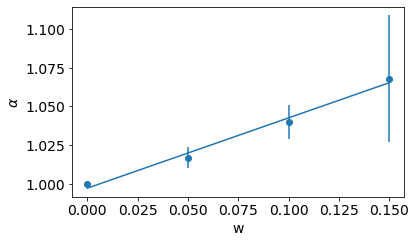

In [12]:
fig, axin = plt.subplots()

ws = [0,0.05, 0.1,0.15,0.2, 0.25, 0.3]

ws = ws[:-3]
alphas = [1,1.017, 1.04, 1.068, 1.21, 1.32, 1.54][:-3]
alpha_er = [0,0.007, 0.01099862,0.0407427, 0.07][:-1]

axin.errorbar(ws, alphas, yerr = alpha_er,fmt = "o")
axin.set_xlabel("w")
axin.set_ylabel("$\\alpha$")

def lin(x, y_int, m):
    return y_int + m * x
wspace = np.linspace(min(ws),max(ws),100)
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(alphas, pars, x = ws)

axin.plot(wspace, lin_fit.params["y_int"].value + lin_fit.params["m"].value*wspace, "C0")



### w dependence

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


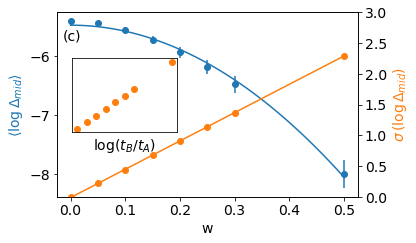

In [127]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w), Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
Delta_mids[0] = comp_per[(4000,ll)][ll//2]
Stats[0] = stats.describe([Delta_mids[0]]*10000)
Stats_log[0] = stats.describe(np.log([Delta_mids[0]]*10000))
        
ws = [w for w in sorted(Stats.keys())]
tau_n[9]
rhos = []
for w in ws:
    wa = 2*w/(1+tau)
    wb = tau*wa
    rhos += [(1-wa)/(1+wb)]


fig, ax1 = plt.subplots()

ax1.plot(ws,[Stats_log[w].mean for w in ws], "o")
ax1.errorbar(ws,[Stats_log[w].mean for w in ws],yerr = [np.sqrt(Stats_log[w].variance)/np.sqrt(Stats_log[w].nobs) for w in ws], fmt = 'none', color = "C0")

ax2 = ax1.twinx()
ax2.plot(ws,[np.sqrt(Stats_log[w].variance) for w in ws], "C1o")
ax1.set_xlabel("w")
ax1.set_ylabel("$\\langle\\log\,\\Delta_{mid}\\rangle$", color = "C0")
ax2.set_ylabel("$\sigma\,(\\log\,\\Delta_{mid})$", color = "C1")

ax1.annotate("(c)",(0.02,0.85),xycoords = 'axes fraction')

def lin(x, y_int, m):
    return y_int + m * x
wspace = np.linspace(min(ws),max(ws),100)

Fs = [Stats_log[0].mean - Stats_log[w].mean for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs, pars, x = [w**2 for w in ws])
ax1.plot(wspace, [Stats_log[0].mean - lin_fit.params["y_int"].value - lin_fit.params["m"].value*w**2 for w in wspace], "C0")

Fs = [np.sqrt(Stats_log[w].variance) for w in ws]
mod = lmf.Model(lin)
pars = mod.make_params(y_int = 1.0, m = 1.0)
lin_fit = mod.fit(Fs, pars, x = [w for w in ws])
ax2.plot(wspace, [lin_fit.params["y_int"].value + lin_fit.params["m"].value*w for w in wspace], "C1")
ax2.set_ylim([0,3])

axin = ax1.inset_axes([0.05,0.35,0.35,0.4])
axin.plot(np.log(1/np.array(rhos)),[np.sqrt(Stats_log[w].variance) for w in ws], "C1o")
axin.set_yticks([])
axin.set_xticks([])
axin.set_xlabel("$\\log\\left(t_B/t_A\\right)$")

plt.savefig("FC-w.pdf")

Text(0, 0.5, '$\\sigma(\\log \\Delta_{mid})$')

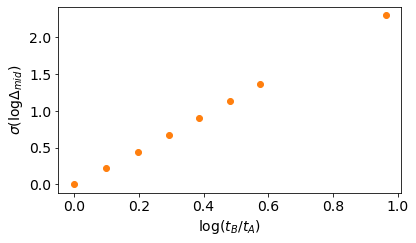

In [114]:
plt.plot(np.log(1/np.array(rhos)),[np.sqrt(Stats_log[w].variance) for w in ws], "C1o")
plt.xlabel("$\\log\\left(t_B/t_A\\right)$")
plt.ylabel("$\\sigma(\\log \\Delta_{mid})$")

### Histogram

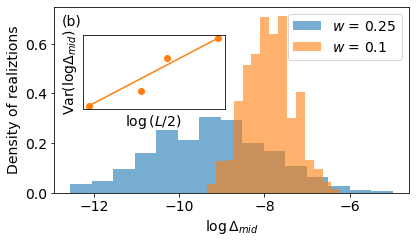

In [15]:
ll = 987
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w), Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())]

fig, ax = plt.subplots()

ax.hist(np.log(Delta_mids[0.25]), bins = 15, label = "$w$ = 0.25", alpha = 0.6, histtype = "stepfilled", density = True)
ax.hist(np.log(Delta_mids[0.1]), bins = 15, label = "$w$ = 0.1", alpha = 0.6, histtype = "stepfilled", density = True)
ax.set_ylabel("Density of realiztions")
ax.set_xlabel("$\log\,\Delta_{mid}$")
# ax.set_xlim((-13,0))
ax.legend(loc = "upper right")

plt.annotate("(b)",(0.02,0.9),xycoords = 'axes fraction')

axin = ax.inset_axes((0.08,0.45,0.4,0.4))

axin.plot(np.log(Lodds[:]), Vars_log[:], "C1o")
axin.plot([np.log(Lodds[0]),np.log(Lodds[-1])],[Vars_log[0],Vars_log[-1]], "C1")
axin.set_xlabel("$\\log\,(L/2)$")
axin.set_ylabel("Var($\\log\\Delta_{mid}$)")
axin.ticklabel_format(axis = 'y',style = "sci", scilimits = (0,0))
axin.set_xticks([])
axin.set_yticks([])

plt.savefig("FC-hist.pdf")



# AAH

In [3]:
comp_AAH = pickle.load(open("comp_AAH.p","rb"))
keys = sorted(comp_AAH.keys())
[print((key, len(comp_AAH[key]))) for key in keys]
/

((89, 2.0), 89)
((144, 2.0), 144)
((233, 2.0), 233)
((377, 2.0), 377)
((610, 2.0), 610)


()

## Delta profiles

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


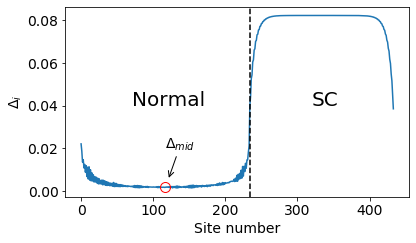

In [87]:
wt = 0.08
chain = hybrid_ring(chain1D(233, u = 0, v = 0, wt = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 4000)

fig, ax = plt.subplots()

ax.plot(chain.Delta)
ax.set_xlabel("Site number")
ax.set_ylabel("$\Delta_i$")
ax.axvline(chain.NN, linestyle = "--", color = "k")
ax.annotate("SC",(320,0.04), fontsize = 20)
ax.annotate("Normal",(70,0.04), fontsize = 20)
ax.annotate("$\Delta_{mid}$", (chain.NN//2, chain.Delta[chain.NN//2]), (chain.NN//2, 0.02), arrowprops = dict(arrowstyle="->", shrinkB = 10))
ax.plot(chain.NN//2, chain.Delta[chain.NN//2].real,"o", ms = 10, mew = 1, mec = 'r', mfc = 'none')
# plt.title("w = {}".format(wt))

# ax.annotate("(b)", (0.02,0.9),xycoords = "axes fraction")
plt.savefig("disDelta.pdf")

/Users/gautam/Dropbox/Notebooks/proximitylib.py:121: RuntimeWarning: divide by zero encountered in true_divide
  while any([err/Del>0.001 and err>0.01*(np.max(self.Delta)+0.01) for err,Del in zip(err_Delta, self.Delta)]):
/Users/gautam/Dropbox/Notebooks/proximitylib.py:121: RuntimeWarning: invalid value encountered in true_divide
  while any([err/Del>0.001 and err>0.01*(np.max(self.Delta)+0.01) for err,Del in zip(err_Delta, self.Delta)]):
//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


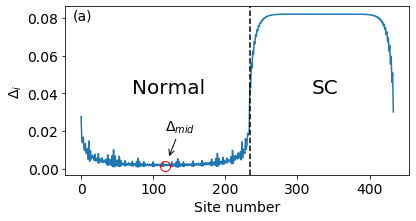

In [28]:
wt = 0.1
# chain = hybrid_ring(chain1D(233, u = 0, v = 0, wt = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 4000)
chain = hybrid_ring(chainFC(n = 11, phi = 0,u = 0, v = 0, w = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 2000)

fig, ax = plt.subplots(figsize = (6,3.3))

ax.plot(chain.Delta)
ax.set_xlabel("Site number")
ax.set_ylabel("$\Delta_i$")
ax.axvline(chain.NN, linestyle = "--", color = "k")
ax.annotate("SC",(320,0.04), fontsize = 20)
ax.annotate("Normal",(70,0.04), fontsize = 20)
ax.annotate("$\Delta_{mid}$", (chain.NN//2, chain.Delta[chain.NN//2]), (chain.NN//2, 0.02), arrowprops = dict(arrowstyle="->", shrinkB = 10))
ax.plot(chain.NN//2, chain.Delta[chain.NN//2].real,"o", ms = 10, mew = 1, mec = 'r', mfc = 'none')
# plt.title("w = {}".format(wt))

ax.annotate("(a)",(0.02,0.92),xycoords = "axes fraction")
plt.savefig("FCDelta.pdf")


# Fractal

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


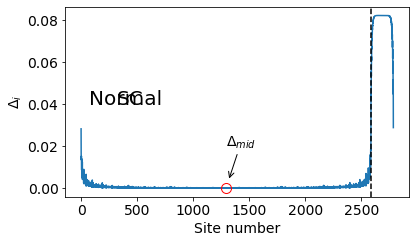

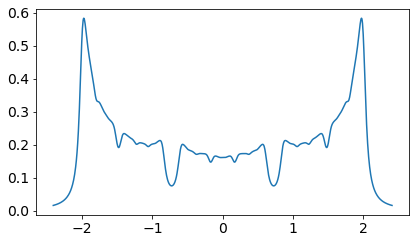

In [35]:
wt = 0.1
# chain = hybrid_ring(chainFC(n = 16, phi = -Fibonacci[13]-Fibonacci[9]+Fibonacci[6]-Fibonacci[2]-1,u = 0, v = 0, w = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 2000)
chain = hybrid_ring(chainFC(n = 16, phi = 0,u = 0, v = 0, w = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 2000)

plt.plot(chain.Delta)
plt.xlabel("Site number")
plt.ylabel("$\Delta_i$")
plt.axvline(chain.NN, linestyle = "--", color = "k")
plt.annotate("SC",(320,0.04), fontsize = 20)
plt.annotate("Normal",(70,0.04), fontsize = 20)
plt.annotate("$\Delta_{mid}$", (chain.NN//2, chain.Delta[chain.NN//2]), (chain.NN//2, 0.02), arrowprops = dict(arrowstyle="->", shrinkB = 10))
plt.plot(chain.NN//2, chain.Delta[chain.NN//2].real,"o", ms = 10, mew = 1, mec = 'r', mfc = 'none')
# plt.title("w = {}".format(wt))
plt.show()

DOS, eex = chain.get_DOS(gam = 0.05)
plt.plot(eex, DOS)
plt.show()

In [99]:
# data2584 = chain.Delta[:chain.NN].real
# pickle.dump(data2584, open("data2584.p", "wb"))

In [19]:
data2584 = pickle.load(open("data2584.p","rb"))

sub1597 = data2584[987//2:-987//2]
sub987 = sub1597[610//2:-610//2]
sub610 = sub987[377//2:-377//2]
sub377 = sub610[233//2:-233//2]
sub233 = sub377[144//2:-144//2]
sub144 = sub233[89//2:-89//2]
sub89 = sub144[55//2:-55//2]
sub55 = sub89[34//2:-34//2]

In [61]:
wt = 0.1
seq = chainFC(n = 16, phi = -Fibonacci[13]-Fibonacci[9]+Fibonacci[6]-Fibonacci[2]-1,u = 0, v = 0, w = wt)["t"]

d_res = []
for i in range(len(seq)):
    err = 0
    count = 0
    while err==0:
        if i<count or i > len(seq) - 1 - (count+1) or seq[i-(count)] != seq[i + (count+1)]:
            err = 1
        else:
            count +=1
    d_res.append(count) 

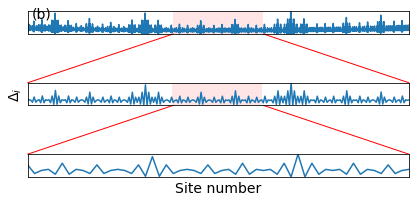

In [89]:
fig, axes = plt.subplots(3,1, figsize = (6,3))

for (ax, sub, LL) in zip(axes, (sub987, sub233, sub55), (377,233,144,89)):
    ax.plot(sub)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.margins(0,0)
#     ax.axvline()

# axres = axes[1].twinx()
# axres.plot(d_res[2584//2-239//2:2584//2+230//2], "C2", alpha = 0.75)
# axres.set_yticks([])
# axres.set_ylabel("$\\lambda_i$")
# plt.annotate("", xycoords = "axes fraction" ,xy = (1,0.7),xytext = (0.93,0.7), arrowprops = dict(arrowstyle="->", shrinkB = 0,color = "C2"))


axes[1].set_ylabel("$\Delta_i$")
axes[2].set_xlabel("Site number")

plt.subplots_adjust(hspace =0)


for (ax1, ax2) in zip(axes[:-1],axes[1:]):
    con = mpl.patches.ConnectionPatch(coordsA = "axes fraction", axesA = ax1, xyA = (1/2*(1/tau**2 + 1/tau**3 + 1/tau**4),0)
                               ,coordsB = "axes fraction", axesB = ax2, xyB = (0,1)
                               ,arrowstyle = "-", color = "red")
    ax1.add_artist(con)
    con = mpl.patches.ConnectionPatch(coordsA = "axes fraction", axesA = ax1, xyA = (1 -1/2*(1/tau**2 + 1/tau**3 + 1/tau**4),0)
                               ,coordsB = "axes fraction", axesB = ax2, xyB = (1,1)
                               ,arrowstyle = "-", color = "red")
    ax1.add_artist(con)
    

axes[0].axvspan(xmin = 987//2 - 233/2, xmax = 987//2 + 233//2,facecolor = "r", alpha = 0.1)
axes[1].axvspan(xmin = 233//2 - 55/2, xmax = 233//2 + 55//2,facecolor = "r", alpha = 0.1)

# plt.tight_layout()

axes[0].annotate("(b)", (0.01,0.74),xycoords = "axes fraction")

# axes[0].set_xticks([0,987])
# axes[0].set_xticklabels([2587//2 - 987//2, 2587//2+987//2])
# axes[1].set_xticks([0,233])
# axes[1].set_xticklabels([2587//2 - 233//2, 2587//2+233//2])
# axes[2].set_xticks([0,55])
# axes[2].set_xticklabels([2587//2 - 55//2, 2587//2+55//2])
# plt.savefig("fractalv2.pdf")

plt.savefig("fractal.pdf")


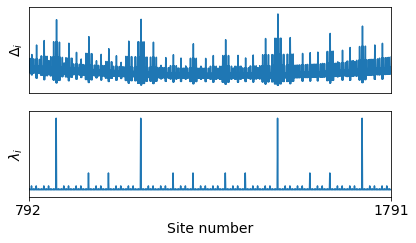

In [88]:
fig, axes = plt.subplots(2)
plt.subplots_adjust(hspace = 0.1)
ax1, ax2 = axes

lims = [2584//2 - 500,2584//2+500]
ax1.plot(np.arange(lims[0],lims[-1]),data2584[lims[0]:lims[1]])
ax2.plot(np.arange(lims[0],lims[-1]),d_res[lims[0]:lims[1]])

ax1.get_xaxis().set_visible(False)
ax2.set_xlabel("Site number")
ax1.set_yticks([])
ax2.set_yticks([])
ax2.set_xticks(np.linspace(lims[0],lims[1]-1,2))
ax1.margins(0,0.1)
ax2.margins(0,0.1)

ax1.set_ylabel("$\\Delta_i$")
ax2.set_ylabel("$\\lambda_i$")

plt.savefig("resonators.pdf")


In [47]:
lims

[1173, 1407]

# Chain

In [47]:
wt = 0.1
temp = chainFC(n = 16, phi = -Fibonacci[13]-Fibonacci[9]+Fibonacci[6]-Fibonacci[2]-1,u = 0, v = 0, w = wt)['t'][987//2:-987//2][610//2:-610//2][377//2:-377//2][233//2:-233//2][144//2:-144//2][89//2:-89//2][55//2:-55//2][34//2:-34//2]

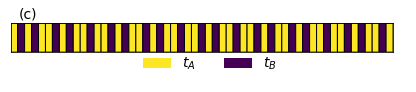

In [63]:
fig, ax1= plt.subplots(figsize = (6,1.5))
# ax = plt.subplot()
ax1.axis('off')

ax = ax1.inset_axes((0,0.45,0.96,0.4))

# ax.pcolor(np.array([[1 if ltr=='A' else 0 for ltr in FCs[8][0]]]), edgecolors='k', linewidths=1)
ax.pcolor(np.array([temp]), edgecolors='k', linewidths=1)

axdummy = ax1.twinx()
axdummy.axis("off")
axdummy.set_ylabel("dummy", color = "white")


ax.set_yticks([])
ax.set_xticks([])
# ax.annotate("$t_A$", (0.5,1), (0.5,1.8), arrowprops = dict(arrowstyle = "->"), fontsize = 14)
# ax.annotate("$t_B$", (4.5,1), (7.5,1.8), arrowprops = dict(arrowstyle = "->"), fontsize = 14)
# rect1 = mpl.patches.Rectangle((3,1.7),1,0.5,linewidth=0,edgecolor='r',facecolor=plt.cm.get_cmap('viridis')(1.0), clip_on=False)
# ax.add_patch(rect1)
# rect2 = mpl.patches.Rectangle((10,1.7),1,0.5,linewidth=0,edgecolor='r',facecolor=plt.cm.get_cmap('viridis')(0.0), clip_on=False)
# ax.add_patch(rect2)
ax1.annotate("(c)",(0.02,0.92),xycoords = "axes fraction")
ax1.legend(handles=([mpl.patches.Patch(facecolor = plt.cm.get_cmap('viridis')(1.0), label="$t_A$"), mpl.patches.Patch(facecolor = plt.cm.get_cmap('viridis')(0.0), label="$t_B$")]), ncol = 2, loc = "lower center", frameon = False)
plt.savefig("FC-sketch.pdf")

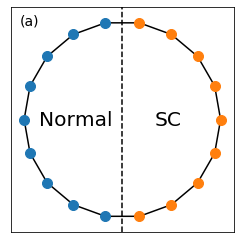

In [15]:
bg = "w"
txt = "k"


fig, ax = plt.subplots()

#Make a larger circle

#thetas = np.linspace(0,2*np.pi)
#rhos = np.linspace(0,1)
#
#pts = np.array([[rho*np.cos(theta), rho*np.sin(theta)] for theta in thetas for rho in rhos]).T
#ax.scatter(pts[0],pts[1])

L = 18

thetas = np.arange(-L//4 + 1,L//4 + 1)*(2*np.pi/L)
sites_xr = np.cos(thetas)
sites_yr = np.sin(thetas)


thetas = np.arange(-L//4 + 1,L//4 + 1)*(2*np.pi/L) + np.pi
sites_xl = np.cos(thetas)
sites_yl = np.sin(thetas)


sites_x = np.append(np.concatenate((sites_xr, sites_xl)),sites_xr[0])
sites_y = np.append(np.concatenate((sites_yr, sites_yl)),sites_yr[0])

ax.plot(sites_x, sites_y, color = txt, zorder = 0)
ax.axvline(0, linestyle = "--", color = txt)


ax.scatter(sites_xr, sites_yr, s = 100, color = "C1")
ax.scatter(sites_xl, sites_yl, s = 100, color = "C0")

ax.annotate("SC",(1/3,-1/15), fontsize = "x-large", color = txt)
ax.annotate("Normal",(-13.5/16,-1/15), fontsize = "x-large", color = txt)
ax.annotate("(a)",(0.04,0.92),xycoords = "axes fraction")

ax.set_aspect("equal")
#ax.set_facecolor(bg)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.savefig('ring.pdf',bbox_inches='tight')

# Diagonal disorder

In [31]:
comp_disdiag = pickle.load(open("comp_disdiag.p","rb"))
[print((key, len(comp_disdiag[key]))) for key in sorted(comp_disdiag.keys())]
/
keys = sorted(comp_disdiag.keys())

((89, 0.005), 1051)
((89, 0.25), 1550)
((89, 0.4), 2500)
((89, 0.5), 500)
((89, 0.8), 500)
((89, 2.0), 50)
((144, 0.005), 50)
((144, 0.25), 50)
((144, 0.8), 50)
((144, 2.0), 50)
((233, 0.005), 50)
((233, 0.25), 50)
((233, 0.5), 100)
((233, 0.8), 50)
((233, 2.0), 50)
((377, 0.005), 50)
((377, 0.25), 50)
((377, 0.5), 100)
((377, 0.8), 50)
((377, 2.0), 50)
((610, 0.005), 50)
((610, 0.25), 25)
((610, 0.5), 100)
((610, 0.8), 50)
((610, 2.0), 25)
((987, 0.005), 25)
((987, 0.25), 10)
((987, 0.5), 25)
((987, 0.8), 25)
((987, 2.0), 10)
((1597, 0.005), 10)
((1597, 0.25), 20)
((1597, 0.5), 10)
((1597, 0.8), 10)
((2584, 0.8), 2)


(233, 0.005) 50
(233, 0.25) 50
(233, 0.5) 100
(233, 0.8) 50
(377, 0.005) 50
(377, 0.25) 50
(377, 0.5) 100
(377, 0.8) 50
(610, 0.005) 50
(610, 0.25) 25
(610, 0.5) 100
(610, 0.8) 50
(987, 0.005) 25
(987, 0.25) 10
(987, 0.5) 25
(987, 0.8) 25
(1597, 0.005) 10
(1597, 0.25) 20
(1597, 0.5) 10
(1597, 0.8) 10


Text(0, 0.5, '$Var(\\Delta_{mid} L)/L$')

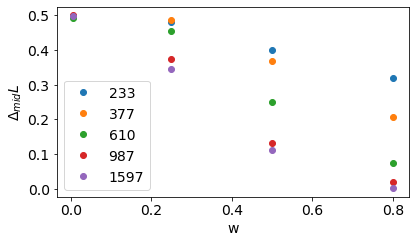

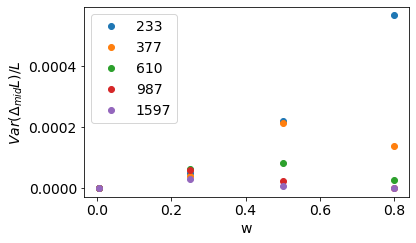

In [32]:
offset = 20.92
# offset = 0

Ls = [233,377, 610,987,1597]
keys = sorted(comp_disdiag.keys())
        
keys = [(L,w) for (L,w) in keys if L in Ls and w<2]
[print(key, len(comp_disdiag[key])) for key in keys]

Delta_mids = {}
Delta_mids2 = {}
As = {}
AsL = {}
Vars ={}
VarsL = {}
ErrsL = {}
for key in keys:
    L,w = key
    Delta_mids[key] = [1/2*Delta[L//2] +1/2*Delta[(L+1)//2] for Delta in comp_disdiag[key]]
    Delta_mids2[key] = [Delta[(L+1)//2] for Delta in comp_disdiag[key]]
    As[key] = stats.describe(Delta_mids[key]).mean
    AsL[key] = As[key]*(L+offset)
    Vars[key] = stats.describe(Delta_mids2[key]).variance
    VarsL[key] = Vars[key]*(L+offset)**2
    ErrsL[key] = np.sqrt(VarsL[key])/np.sqrt(len(comp_disdiag[key]))
    
fig, ax = plt.subplots()
for L in Ls:
    ws = [w for (l,w) in keys if l==L]
    ax.plot(np.array(ws), [AsL[(L,w)] for w in ws], "o",label = L)
#     ax.errorbar(ws, [AsL[(L,w)] for w in ws],yerr = [ErrsL[(L,w)] for w in ws], fmt = "o",label = "L = {}".format(L))
ax.legend()
ax.set_xlabel("w")
ax.set_ylabel("$\Delta_{mid} L$")

fig, ax = plt.subplots()
for L in Ls:
    ws = [w for (l,w) in keys if l==L]
    ax.plot(ws, [VarsL[(L,w)]/L for w in ws], "o", label = L)      
ax.legend()
ax.set_xlabel("w")
ax.set_ylabel("$Var(\Delta_{mid} L)/L$")




offset = 10.81
alpha = 1.00
offset = 10.81
alpha = 1.00


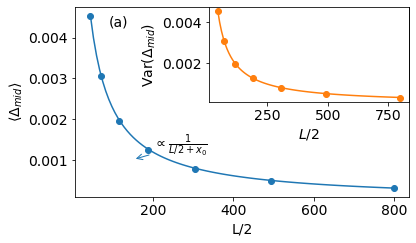

In [61]:
keys = comp_disdiag.keys()
Delta_mids = {}
Delta_mids2 = {}
for (L,wt) in keys:
    if wt ==0.005:
        Delta_mids[L] = [1/2*Delta[L//2]+1/2*Delta[(L+1)//2] for Delta in comp_disdiag[(L,wt)]]
        Delta_mids2[L] = [Delta[L//2] for Delta in comp_disdiag[(L,wt)]]
        
Ls = np.array([L for L in sorted(Delta_mids.keys())])
As = np.array([stats.describe(Delta_mids[L]).mean for L in Ls])
Vars = np.array([stats.describe(Delta_mids2[L]).mean for L in Ls])
Vars_log = np.array([stats.describe(np.log(Delta_mids2[L])).variance for L in Ls])
LLs =Ls/2

def inv(x, amp,offset,alpha ):
    return amp * 1/(x**alpha + offset)

mod = lmf.Model(inv)
pars = mod.make_params(amp = 1.0, offset = 0,alpha=1)
pars['alpha'].set(vary = False)
inv_fit = mod.fit([stats.describe(Delta_mids[L]).mean for L in Ls],pars, x=LLs)



lls = np.linspace(min(Ls),max(Ls),100)/2

fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(LLs, [stats.describe(Delta_mids[L]).mean for L in Ls], "C0o")
ax1.plot(lls, inv_fit.params["amp"].value/(lls + inv_fit.params["offset"].value))

ax1.annotate("$\propto \\frac{{{}}}{{{}}}$".format(1,"L/2 + x_0"),(233/4+377/4,As[3]/2 + As[4]/2),xytext = (200,As[3]), arrowprops = dict(arrowstyle="->",color = "C0"))
ax1.set_xlabel("L/2")
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle$")

print("offset = {:.2f}".format(inv_fit.params["offset"].value))
print("alpha = {:.2f}".format(inv_fit.params["alpha"].value))


axin = ax1.inset_axes([0.4,0.5,0.6,0.5])
# pars['alpha'].set(vary = True)
inv_fit2 = mod.fit([Vars for L in Ls],pars, x=LLs)
print("offset = {:.2f}".format(inv_fit2.params["offset"].value))
print("alpha = {:.2f}".format(inv_fit2.params["alpha"].value))

axin.plot(LLs, Vars, "C1o")
axin.plot(lls, inv_fit2.params["amp"].value/(lls + inv_fit2.params["offset"].value), "C1")
axin.set_xlabel("$L/2$")
axin.set_ylabel("Var($\\Delta_{mid}$)")
# axin.set_xticks([])

ax1.annotate("(a)",(0.1,0.9),xycoords = 'axes fraction')
plt.savefig("weak-disdiag-scaling.pdf")




zeta = 16.723
alpha = 0.749


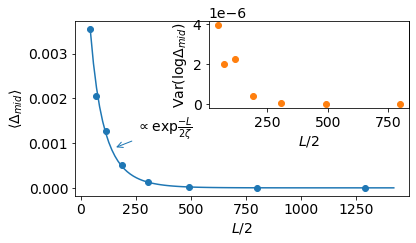

In [41]:
keys = comp_disdiag.keys()
Delta_mids = {}
Delta_mids2 = {}
for (L,wt) in keys:
    if wt ==0.8:
        Delta_mids[L] = [1/2*Delta[L//2]+1/2*Delta[(L+1)//2] for Delta in comp_disdiag[(L,wt)]]
        Delta_mids2[L] = [Delta[L//2] for Delta in comp_disdiag[(L,wt)]]
        
Ls = np.array([L for L in sorted(Delta_mids.keys())])[:]
As = np.array([stats.describe(Delta_mids[L]).mean for L in Ls])
Vars = np.array([stats.describe(Delta_mids2[L]).variance for L in Ls])
Vars_log = np.array([stats.describe(np.log(Delta_mids2[L])).variance for L in Ls])

LLs =Ls/2

def lin(x, log_amp, xi, alpha):
    return log_amp - xi*x**alpha

mod = lmf.Model(lin)
pars = mod.make_params(log_amp = 0, xi=10, alpha = 0.5)
# pars['alpha'].set(vary = False) 
lin_fit = mod.fit(np.log(As)[:-1],pars, x=LLs[:-1])

lls = np.linspace(min(Ls),1.1*max(Ls),100)/2

fig, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0, hspace=0.05)

ax1.plot(Ls/2, As, "C0o")
ax1.plot(lls,np.exp(lin_fit.params["log_amp"].value)*np.exp(-lin_fit.params["xi"].value*lls**lin_fit.params["alpha"]), "C0")
ax1.annotate("$\propto \\exp\\frac{{-L}}{{2 \\zeta}}$",(233/4+377/4,As[2]/2 + As[3]/2),xytext = (250,As[2]), arrowprops = dict(arrowstyle="->",color = "C0"))

print("zeta = {:.3f}".format(1/lin_fit.params["xi"].value))
print("alpha = {:.3f}".format(lin_fit.params["alpha"].value))

ax1.set_xlabel("$L/2$")
ax1.set_ylabel("$\\langle\Delta_{mid}\\rangle$")

plt.savefig("strong-disdiag-scaling.pdf")

axin = ax1.inset_axes([0.4,0.5,0.6,0.5])
axin.plot(LLs[:-1], Vars[:-1], "C1o")
axin.set_xlabel("$L/2$")
axin.set_ylabel("Var($\\log\\Delta_{mid}$)")
axin.ticklabel_format(axis = 'y',style = "sci", scilimits = (0,0))
# axin.set_xticks([])

plt.savefig("strong-disdiag-scaling.pdf")


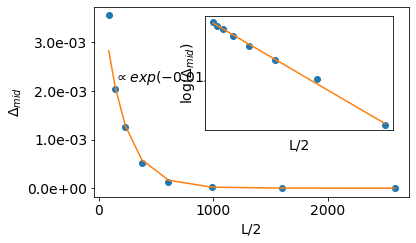

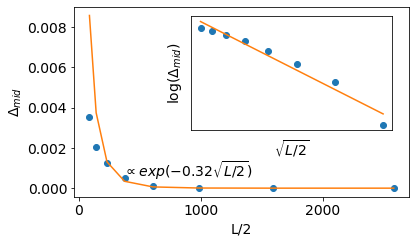

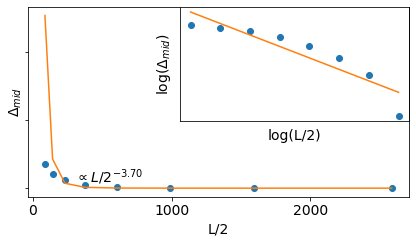

In [42]:
temp = scaling(Ls,As)
temp.fit_to_exp()
temp.fit_to_expstr()
temp.fit_to_pow()